#### Dataset link-->> https://drive.google.com/drive/folders/1eEL3dpCk_mfSsvEhME04-qJkWjrpi8Ib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shampoo=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/shampoo_with_exog.csv')
shampoo.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [3]:
type(shampoo)

pandas.core.frame.DataFrame

#### import csv data in a csv format

In [4]:
shampoo=pd.read_csv('F:\Time_Series Data Analysis\data science Tutorials/shampoo_with_exog.csv',index_col=[0],parse_dates=True)
shampoo.head()

,Sales,Inflation
Month,,
1-Jan,266.0,1
2-Jan,145.9,3
3-Jan,183.1,5
4-Jan,119.3,5
5-Jan,180.3,4


In [5]:
type(shampoo)

pandas.core.frame.DataFrame

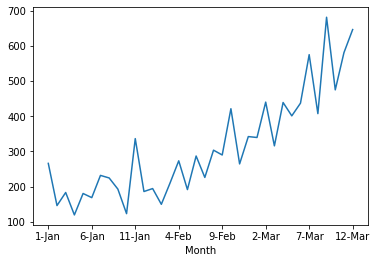

In [6]:
shampoo['Sales'].plot()

#### clearly visible that a trend is present with some cyclical variation

##### plot sales in terms of lets say using dot or something else

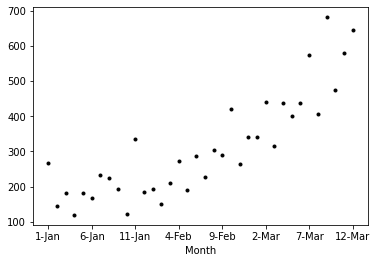

In [7]:
shampoo['Sales'].plot(style='k.')

In [8]:
shampoo.shape

(36, 2)

In [9]:
shampoo.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.600000,148.937164,119.3,192.45,280.15,411.1,682.0
Inflation,36.0,3.388889,1.535816,1.0,2.00,4.00,5.0,5.0


### smoothing time-series 
#### smoothing is basically done by Moving Avearge
#### MA highly used in Stock Market Analysis as well as in Some business as well

In [10]:
### lets say I consider first 5 days as a Moving value
shampoo_ma=shampoo['Sales'].rolling(window=5).mean()

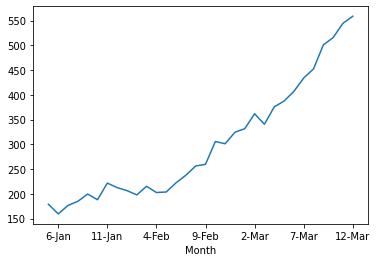

In [11]:
shampoo_ma.plot()

## create a baseline model(Naive Model or Initial Model)

#### previous value is a best reflector of next value,    the recent history is a best refection of the future
#### using shift we can create baseline model
    

In [12]:
shampoo['sales_shift']=shampoo['Sales'].shift(1)

In [13]:
shampoo.head()

,Sales,Inflation,sales_shift
Month,,,
1-Jan,266.0,1,NaN
2-Jan,145.9,3,266.0
3-Jan,183.1,5,145.9
4-Jan,119.3,5,183.1
5-Jan,180.3,4,119.3


In [14]:
shampoo.columns=['Actual_sales','Inflation','Forecast_sales']

In [15]:
shampoo.dropna(inplace=True)

In [16]:
shampoo.head()

,Actual_sales,Inflation,Forecast_sales
Month,,,
2-Jan,145.9,3,266.0
3-Jan,183.1,5,145.9
4-Jan,119.3,5,183.1
5-Jan,180.3,4,119.3
6-Jan,168.5,5,180.3


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
### then check accuracy
np.sqrt(mean_squared_error(shampoo['Actual_sales'],shampoo['Forecast_sales']))

108.23764726616282

#### now u will see we dont have good model, so now we can create some more model lets say AR, MA & MAny more
#### but at the end of the day, we will see most of the practitioner uses ARIMA for Time-Series, ARIMA(p,d,q)


In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

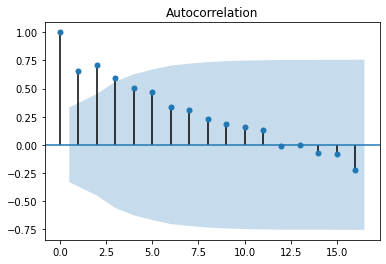

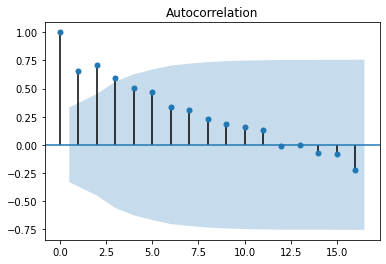

In [20]:
plot_acf(shampoo['Actual_sales'])

In [21]:
### p-->3, q-->2, d-->?? (usually between 0 to 2)

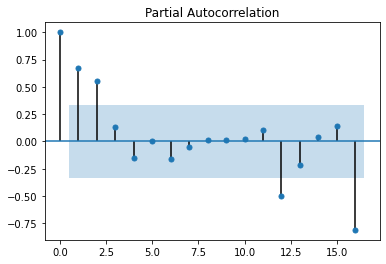

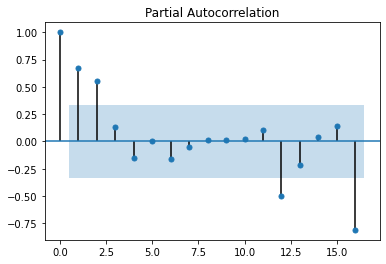

In [22]:
plot_pacf(shampoo['Actual_sales'])

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
shampoo.head()

,Actual_sales,Inflation,Forecast_sales
Month,,,
2-Jan,145.9,3,266.0
3-Jan,183.1,5,145.9
4-Jan,119.3,5,183.1
5-Jan,180.3,4,119.3
6-Jan,168.5,5,180.3


In [25]:
shampoo_clean=shampoo['Actual_sales']

In [26]:
training_data=shampoo_clean[0:25]
test_data=shampoo_clean[25:]

### create test data that is basically unseen to our model, or which is basically is used for evalaution

In [27]:
len(training_data)

25

In [28]:
len(test_data)

10

In [29]:
### arima= ARIMA(training_data,order=(p,d,q))

arima= ARIMA(training_data,order=(2,1,3))

C:\Users\mcr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mcr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
### then doing model.fit ie fitting our model to data
model=arima.fit()

C:\Users\mcr\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [31]:
model.aic

273.77727211628843

In [32]:
pred= model.forecast(steps=10)[0]

In [33]:
#### now we can compare our prediction in some cases, we are doing very well whereas in some cases, we are not doing good prediction

In [34]:
np.sqrt(mean_squared_error(test_data,pred))

136.83463601621352

In [35]:
### now u will see it is better than the model that we have created as Error is not decreasing, that shows baseline model
### is much more good in such sceario rather than ARIMA as, 108<136


## model Tuning or Hyperparameter Tuning or choosing the best pair of (p,d,q)

In [36]:
#### now define hyper-para=meters 
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair, 
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=shampoo_clean[0:25]
            test=shampoo_clean[25:]
            predictions=[]
            ### now we have train & test data that we can pass to our algorithm
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    ##displacement=0
                    model=arima.fit(disp=0)
                    pred_y=model.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error, order))
                except:
                    continue


MSE is 77876.373016 with order (0, 0, 0)
MSE is 58397.26977495443 with order (0, 0, 1)
MSE is 37686.44683575291 with order (0, 0, 2)
MSE is 38298.46710021833 with order (0, 0, 3)
MSE is 14624.996267361112 with order (0, 1, 0)
MSE is 32822.09484223045 with order (0, 1, 1)
MSE is 48339.14958644049 with order (0, 1, 2)
MSE is 44379.20908931899 with order (0, 1, 3)
MSE is 14992.647400756145 with order (0, 2, 0)
MSE is 13794.288171003145 with order (0, 2, 1)
MSE is 22489.950538001336 with order (0, 2, 2)
MSE is 26634.814487919888 with order (0, 2, 3)
MSE is 37922.16900492167 with order (1, 0, 0)
MSE is 77876.05773899806 with order (1, 0, 1)
MSE is 23690.10486158566 with order (1, 1, 0)
MSE is 33466.7263137738 with order (1, 1, 1)
MSE is 42066.41923296686 with order (1, 1, 2)
MSE is 38991.98471158688 with order (1, 1, 3)
MSE is 45715.93647349282 with order (1, 1, 4)
MSE is 13690.990306270429 with order (1, 2, 0)
MSE is 33870.15007018153 with order (2, 0, 0)
MSE is 36963.03792325884 with orde

In [ ]:
#### min MSE-13687 on (2,2,0)

In [39]:
np.sqrt(13687)

116.9914526792449

In [ ]:
#### now we will see still, Baseline performs bettter so we can stay with Baseline , lets try Arima Model